In [ ]:
# LOAN GRANT DATASET ANALYSIS - ADDRESSING ALL REQUIREMENTS
# ========================================================================
# REQUIREMENTS ADDRESSED:
# 1. Consider the Loangrant.CSV dataset
# 2. Do all pre-processing steps (missing values, outliers, duplicate instances etc)
# 3. Use Decision Tree, Bagging, Boosting, Random Forest, KNN, and Support Vector Machines models
# 4. Split the data into 80%:20% ratio for model training and testing
# 5. Find confusion matrices of each algorithm at 20% Test and 80% training datasets
# 6. Find accuracy, sensitivity, specificity, MCC, ROC curve plots for each algorithm
# ========================================================================


In [ ]:

# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                           recall_score, roc_curve, auc, matthews_corrcoef)
import warnings
warnings.filterwarnings('ignore')

# Set random state for reproducibility
RANDOM_STATE = 42

print("=" * 80)
print("LOAN GRANT DATASET ANALYSIS - COMPLETE REQUIREMENTS IMPLEMENTATION")
print("=" * 80)

# ============================================================================
# REQUIREMENT 1: CONSIDER THE LOANGRANT.CSV DATASET
# ============================================================================

print("\n🔍 REQUIREMENT 1: LOADING LOANGRANT.CSV DATASET")
print("=" * 60)

# Load the dataset
data = pd.read_csv("loangrant.csv")  # Updated path for general use

print(f"✅ Dataset loaded successfully!")
print(f"📊 Dataset shape: {data.shape}")
print(f"📋 Columns: {list(data.columns)}")

# Display basic info
print("\n📈 Dataset Overview:")
data.info()


LOAN GRANT DATASET ANALYSIS - COMPLETE REQUIREMENTS IMPLEMENTATION

🔍 REQUIREMENT 1: LOADING LOANGRANT.CSV DATASET
✅ Dataset loaded successfully!
📊 Dataset shape: (40771, 19)
📋 Columns: ['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term', 'Credit Score', 'Years in current job', 'Home Ownership', 'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']

📈 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40771 entries, 0 to 40770
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       40771 non-null  object 
 1   Customer ID                   40771 non-null  object 
 2   Loan Status                   40771 non-null  object 
 3   Current Loan Amo



---

#REQUIREMENT 2: DO ALL PRE-PROCESSING STEPS



---




🔧 REQUIREMENT 2: COMPLETE PRE-PROCESSING STEPS

📍 STEP 2.1: HANDLING MISSING VALUES
----------------------------------------
Missing values in dataset:
                              Missing Values  Percentage
Months since last delinquent           22363   54.850261
Credit Score                           21338   52.336219
Annual Income                          21338   52.336219
Years in current job                    1708    4.189252
Bankruptcies                              87    0.213387
Tax Liens                                  6    0.014716
Monthly Debt                               1    0.002453
Years of Credit History                    1    0.002453
Number of Credit Problems                  1    0.002453
Number of Open Accounts                    1    0.002453
Maximum Open Credit                        1    0.002453
Current Credit Balance                     1    0.002453


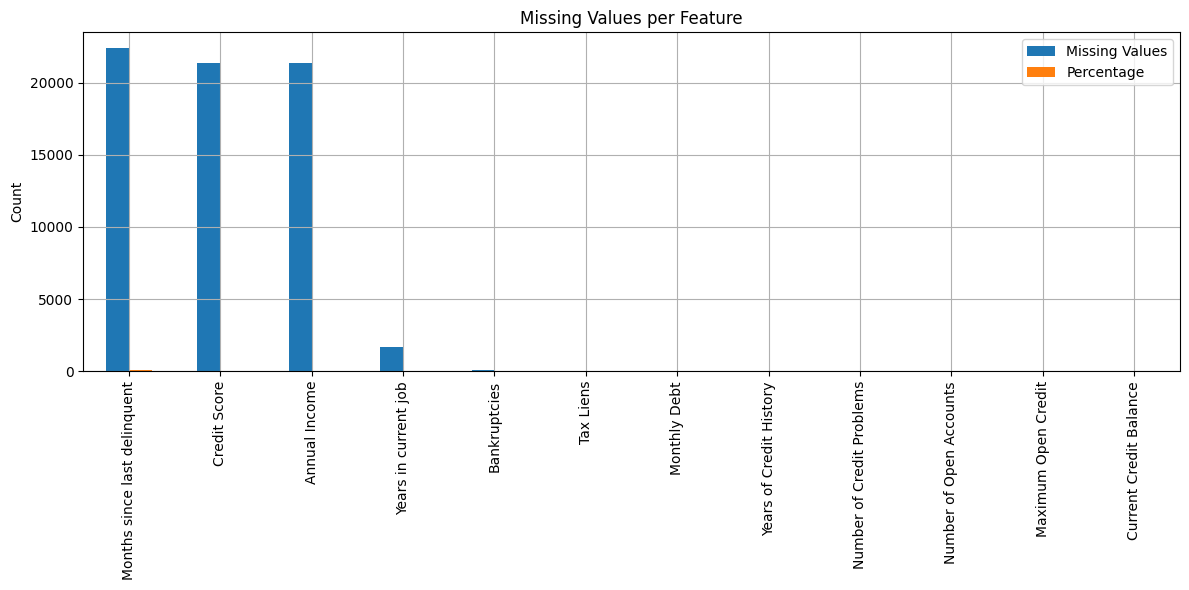

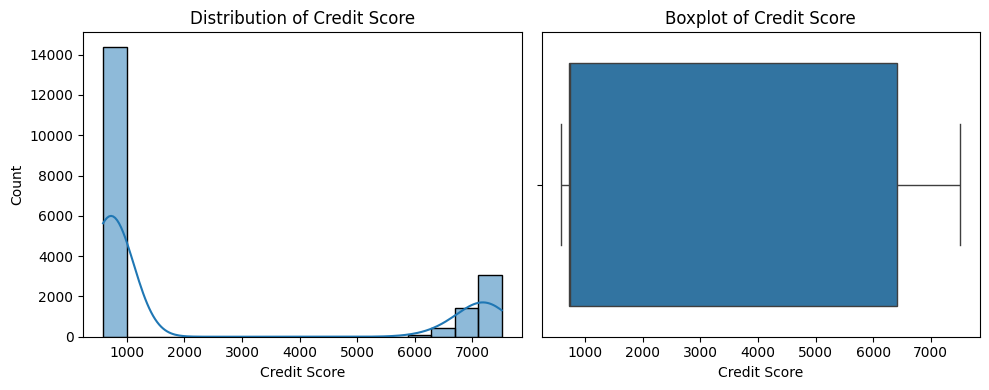

✅ Credit Score: Replaced 21338 missing values with MEDIAN (740.00)
✅ Years in current job: Replaced 1708 missing values with MODE (10+ years)


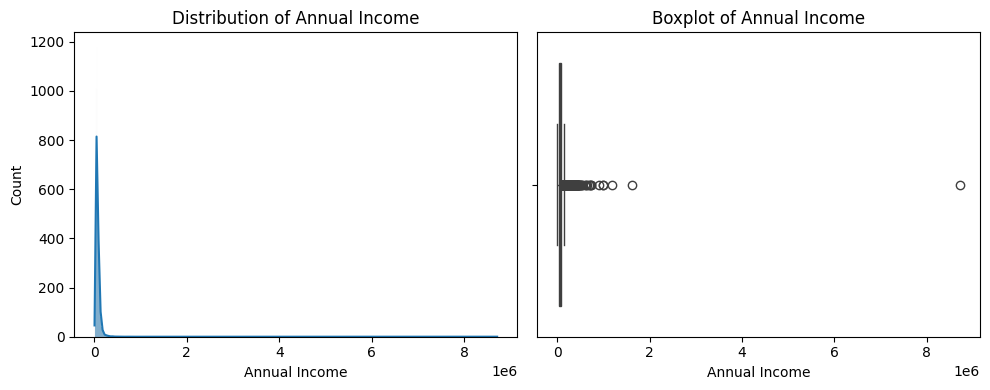

✅ Annual Income: Replaced 21338 missing values with MEDIAN (61182.00)
✅ Monthly Debt: Replaced 1 missing values with MODE (0)


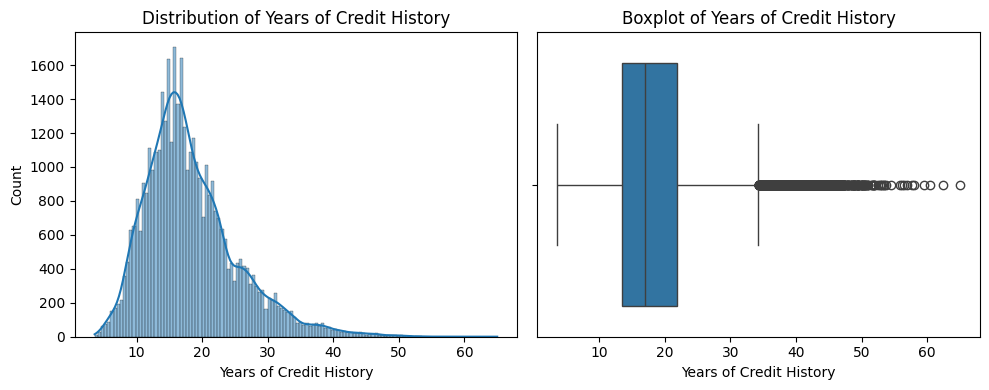

✅ Years of Credit History: Replaced 1 missing values with MEDIAN (17.00)


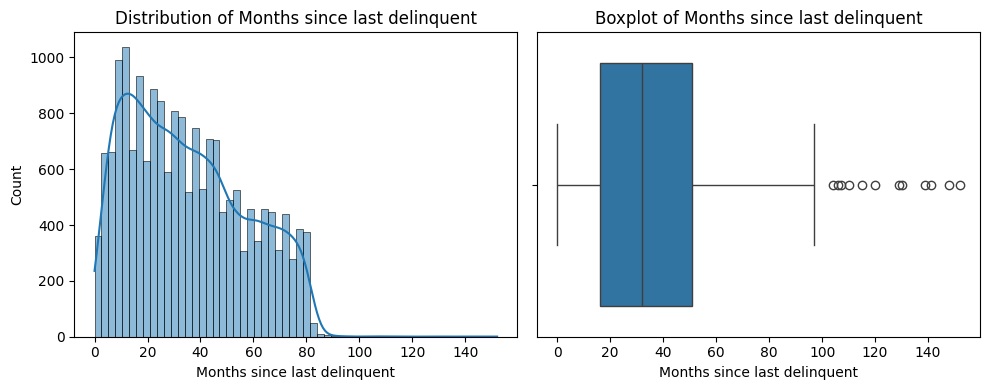

✅ Months since last delinquent: Replaced 22363 missing values with MEAN (35.05)


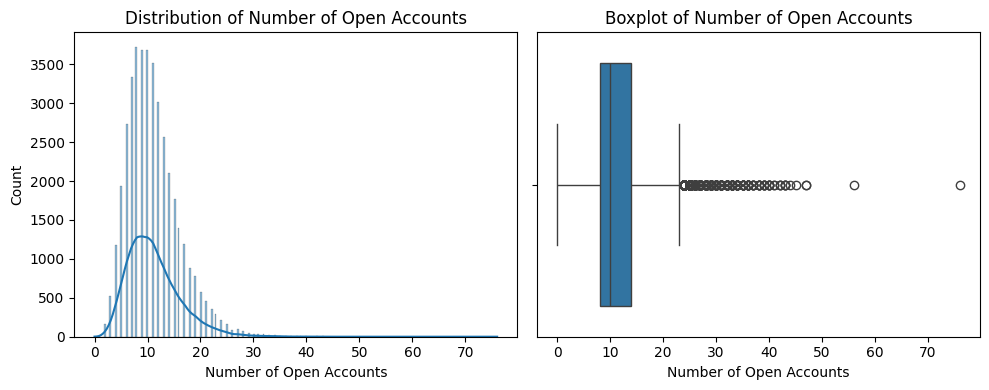

✅ Number of Open Accounts: Replaced 1 missing values with MEDIAN (10.00)


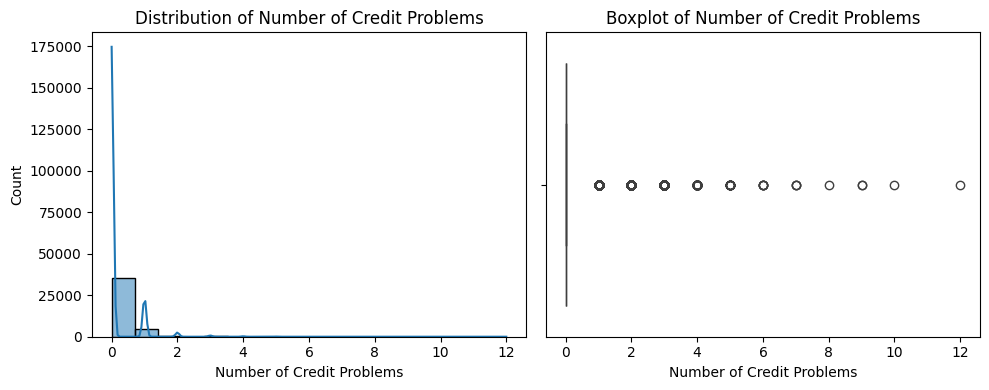

✅ Number of Credit Problems: Replaced 1 missing values with MEDIAN (0.00)


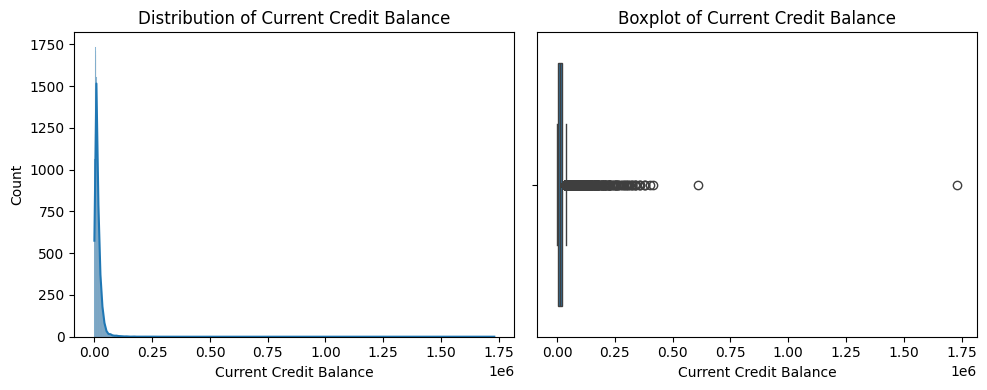

✅ Current Credit Balance: Replaced 1 missing values with MEDIAN (10977.50)
✅ Maximum Open Credit: Replaced 1 missing values with MODE (0)


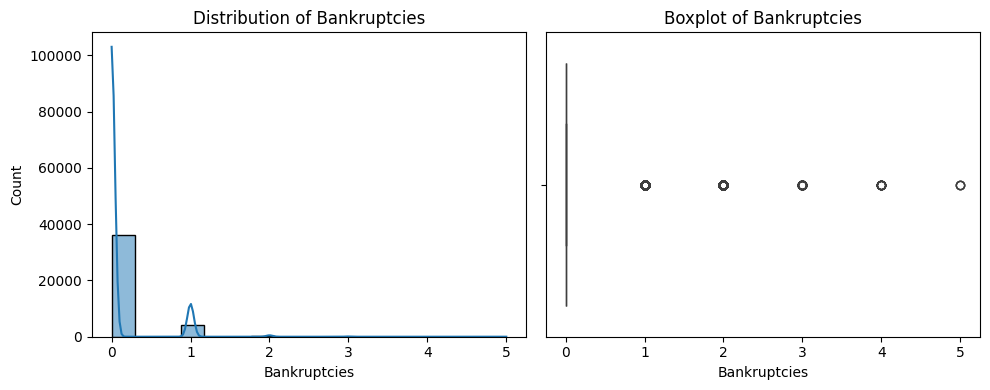

✅ Bankruptcies: Replaced 87 missing values with MEDIAN (0.00)


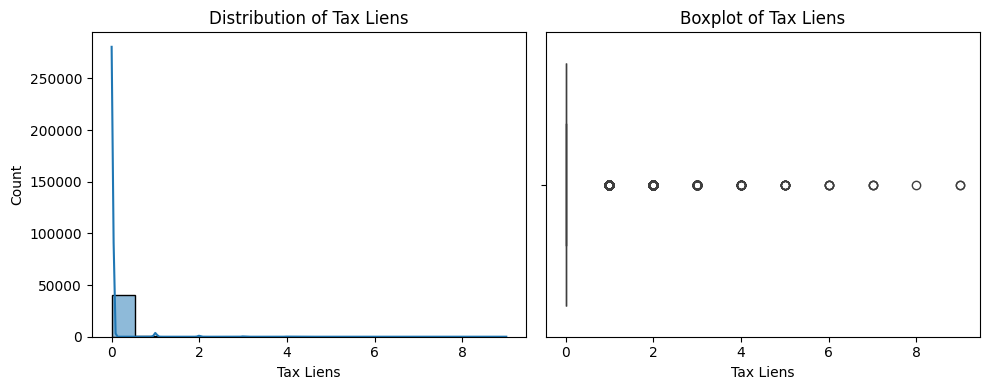

✅ Tax Liens: Replaced 6 missing values with MEDIAN (0.00)
✅ Missing values after handling: 0

📍 STEP 2.2: HANDLING DUPLICATE INSTANCES
----------------------------------------
Duplicate rows before removal: 0
✅ Duplicate rows after removal: 0
✅ Rows removed: 0

📍 STEP 2.3: HANDLING OUTLIERS (OPTIMIZED FOR LARGE DATASETS)
----------------------------------------
✅ Credit Score: Replaced 18954 outliers with median (740.00)
✅ Annual Income: Replaced 19430 outliers with median (61182.00)
✅ Years of Credit History: Replaced 1284 outliers with median (17.00)
✅ Months since last delinquent: Replaced 18408 outliers with median (35.05)
✅ Number of Open Accounts: Replaced 883 outliers with median (10.00)
✅ Number of Credit Problems: Replaced 5517 outliers with median (0.00)
✅ Current Credit Balance: Replaced 2108 outliers with median (10977.50)
✅ Bankruptcies: Replaced 4357 outliers with median (0.00)
✅ Tax Liens: Replaced 759 outliers with median (0.00)
✅ Total outliers replaced: 71700


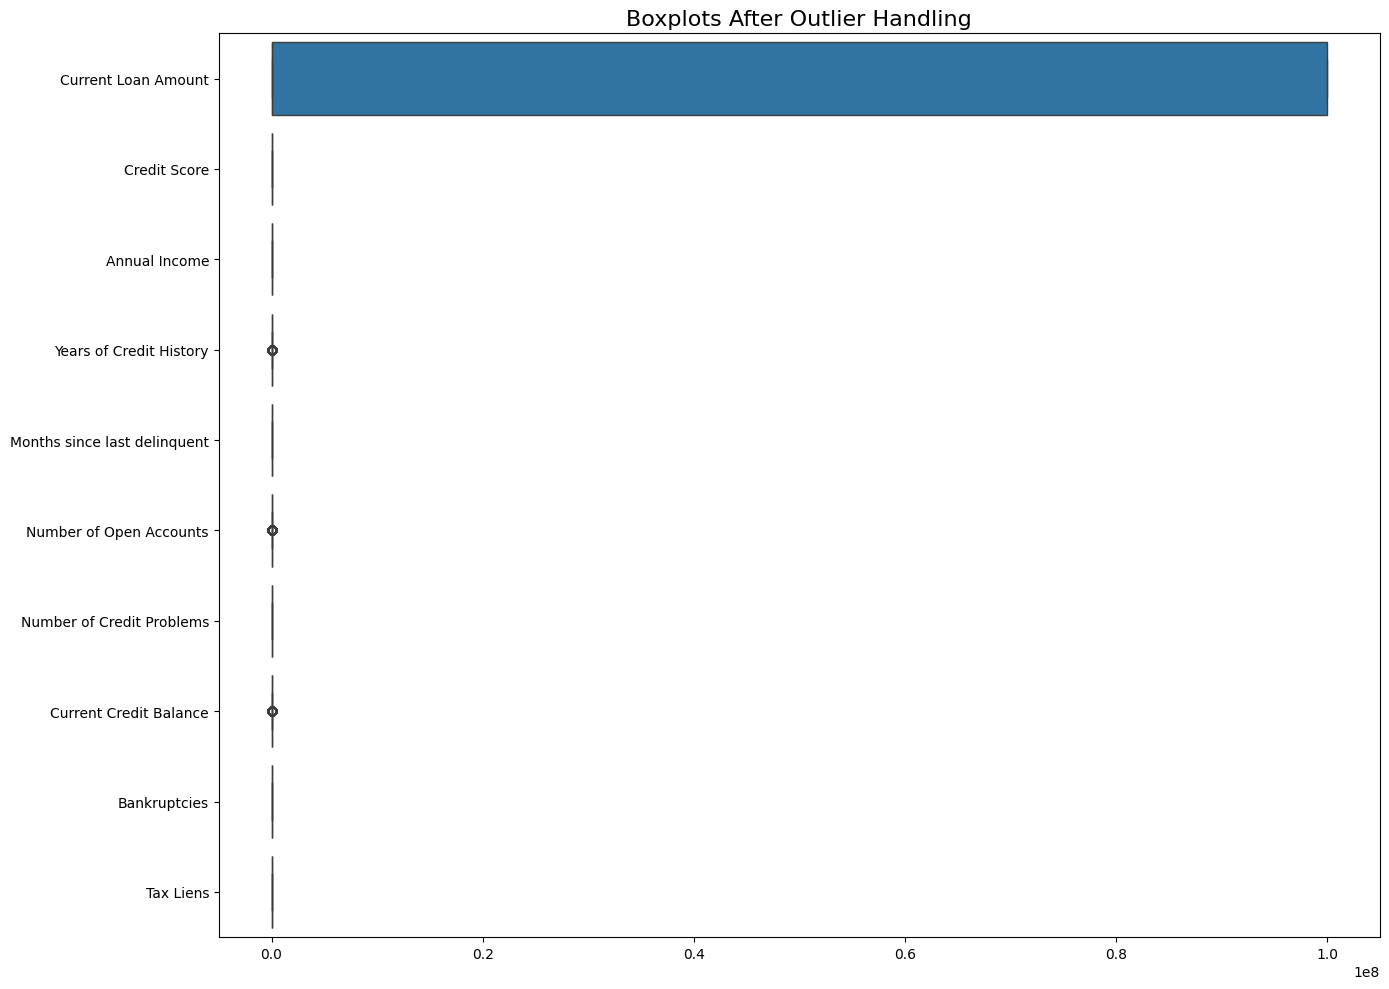


📍 STEP 2.4: FORMATTING CATEGORICAL VARIABLES
----------------------------------------
✅ 'Years in current job' formatted successfully

📍 STEP 2.5: ENCODING CATEGORICAL VARIABLES
----------------------------------------
✅ Loan ID: Encoded 40771 categories
✅ Customer ID: Encoded 40771 categories
✅ Term: Encoded 2 categories
✅ Years in current job: Encoded 5 categories
✅ Home Ownership: Encoded 4 categories
✅ Purpose: Encoded 16 categories
✅ Monthly Debt: Encoded 36439 categories
✅ Maximum Open Credit: Encoded 28849 categories
✅ Target variable encoded: ['Charged Off' 'Fully Paid']


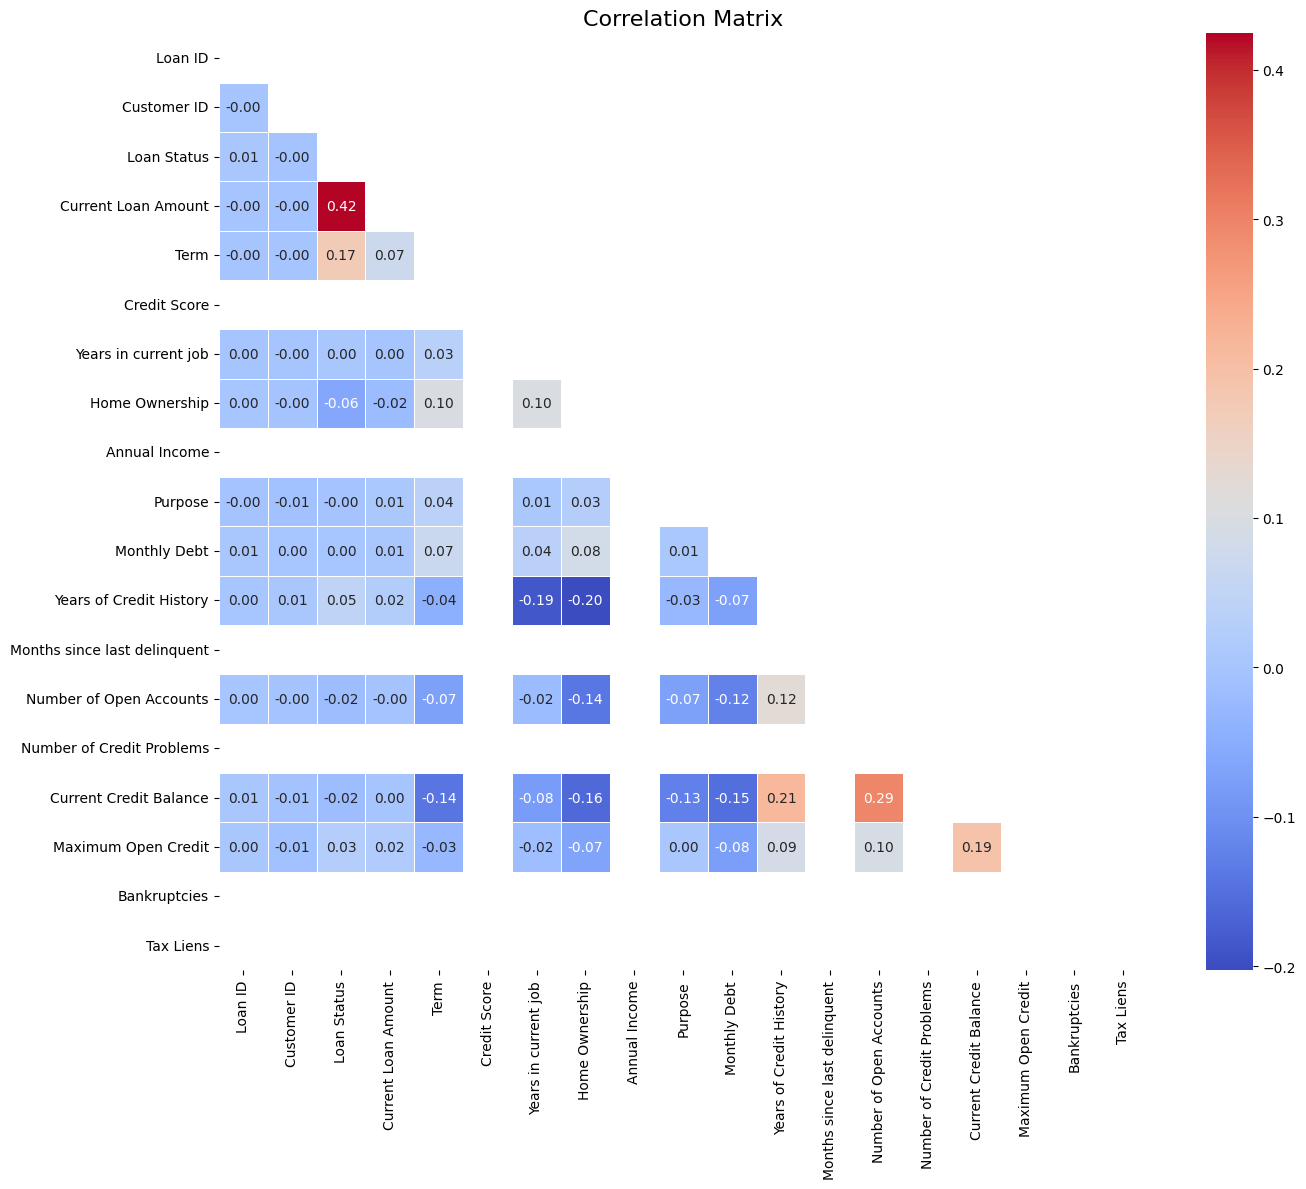


✅ PRE-PROCESSING COMPLETE!
📊 Final dataset shape: (40771, 19)


In [ ]:
print("\n🔧 REQUIREMENT 2: COMPLETE PRE-PROCESSING STEPS")
print("=" * 60)

# 2.1 MISSING VALUES HANDLING
print("\n📍 STEP 2.1: HANDLING MISSING VALUES")
print("-" * 40)

# Check for missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print("Missing values in dataset:")
missing_summary = missing_data[missing_data['Missing Values'] > 0].sort_values('Missing Values', ascending=False)
if len(missing_summary) > 0:
    print(missing_summary)
else:
    print("No missing values found!")

# Visualization: Missing values bar plot
missing_summary.plot(kind='bar', figsize=(12, 6))
plt.title("Missing Values per Feature")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

# Handle missing values
data_processed = data.copy()
cols_with_missing = missing_data[missing_data['Missing Values'] > 0].index.tolist()

for col in cols_with_missing:
    if data_processed[col].dtype in ['int64', 'float64']:
        skewness = data_processed[col].dropna().skew()
        mean_val = data_processed[col].mean()
        median_val = data_processed[col].median()

        # Histogram and boxplot before imputation
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        sns.histplot(data_processed[col].dropna(), kde=True)
        plt.title(f'Distribution of {col}')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=data_processed[col].dropna())
        plt.title(f'Boxplot of {col}')
        plt.tight_layout()
        plt.show()

        if abs(skewness) > 1:
            data_processed[col] = data_processed[col].fillna(median_val)
            print(f"✅ {col}: Replaced {missing_values[col]} missing values with MEDIAN ({median_val:.2f})")
        else:
            data_processed[col] = data_processed[col].fillna(mean_val)
            print(f"✅ {col}: Replaced {missing_values[col]} missing values with MEAN ({mean_val:.2f})")
    else:
        mode_val = data_processed[col].mode()[0]
        print(f"✅ {col}: Replaced {missing_values[col]} missing values with MODE ({mode_val})")
        data_processed[col] = data_processed[col].fillna(mode_val)

print(f"✅ Missing values after handling: {data_processed.isnull().sum().sum()}")

# 2.2 DUPLICATE INSTANCES HANDLING
print("\n📍 STEP 2.2: HANDLING DUPLICATE INSTANCES")
print("-" * 40)

duplicates_before = data_processed.duplicated().sum()
print(f"Duplicate rows before removal: {duplicates_before}")

data_processed = data_processed.drop_duplicates()
duplicates_after = data_processed.duplicated().sum()

print(f"✅ Duplicate rows after removal: {duplicates_after}")
print(f"✅ Rows removed: {duplicates_before - duplicates_after}")

# 2.3 OUTLIERS HANDLING
print("\n📍 STEP 2.3: HANDLING OUTLIERS (OPTIMIZED FOR LARGE DATASETS)")
print("-" * 40)

numeric_cols = data_processed.select_dtypes(include=[np.number]).columns
total_outliers_replaced = 0

for col in numeric_cols:
    q1, q3 = np.percentile(data_processed[col].dropna(), [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outlier_mask = (data_processed[col] < lower_bound) | (data_processed[col] > upper_bound)
    outliers_count = outlier_mask.sum()

    if outliers_count > 0:
        median_val = data_processed[col].median()
        data_processed.loc[outlier_mask, col] = median_val
        total_outliers_replaced += outliers_count
        print(f"✅ {col}: Replaced {outliers_count} outliers with median ({median_val:.2f})")

print(f"✅ Total outliers replaced: {total_outliers_replaced}")

# Visualization: Boxplots after outlier handling
plt.figure(figsize=(14, 10))
sns.boxplot(data=data_processed[numeric_cols], orient="h")
plt.title('Boxplots After Outlier Handling', fontsize=16)
plt.tight_layout()
plt.show()

# 2.4 CATEGORICAL VARIABLES FORMATTING
print("\n📍 STEP 2.4: FORMATTING CATEGORICAL VARIABLES")
print("-" * 40)

job_years_mapping = {
    '< 1 year': '<year',
    'n/a': '<year',
    '1 year': 'two - four years',
    '2 years': 'two - four years',
    '3 years': 'two - four years',
    '4 years': 'two - four years',
    '5 years': 'five - seven years',
    '6 years': 'five - seven years',
    '7 years': 'five - seven years',
    '8 years': 'eight - nine years',
    '9 years': 'eight - nine years',
    '10+ years': 'above 10 years'
}

if 'Years in current job' in data_processed.columns:
    data_processed['Years in current job'] = data_processed['Years in current job'].replace(job_years_mapping)
    print("✅ 'Years in current job' formatted successfully")

# 2.5 ENCODING CATEGORICAL VARIABLES
print("\n📍 STEP 2.5: ENCODING CATEGORICAL VARIABLES")
print("-" * 40)

from sklearn.preprocessing import LabelEncoder
label_encoders = {}
categorical_cols = data_processed.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if col != 'Loan Status':
        le = LabelEncoder()
        data_processed[col] = le.fit_transform(data_processed[col].astype(str))
        label_encoders[col] = le
        print(f"✅ {col}: Encoded {len(le.classes_)} categories")

# Encode target
le_target = LabelEncoder()
data_processed['Loan Status'] = le_target.fit_transform(data_processed['Loan Status'])
print(f"✅ Target variable encoded: {le_target.classes_}")

# Correlation Heatmap
plt.figure(figsize=(14, 12))
corr = data_processed.select_dtypes(include=np.number).corr()
mask = np.triu(corr)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", mask=mask, linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()

print(f"\n✅ PRE-PROCESSING COMPLETE!")
print(f"📊 Final dataset shape: {data_processed.shape}")




---



# REQUIREMENT 3: PREPARE FEATURES AND TARGET


---



In [ ]:
print("\n🎯 REQUIREMENT 3: PREPARING FEATURES FOR ML MODELS")
print("=" * 60)

# Prepare features and target
feature_cols = [col for col in data_processed.columns if col not in ['Loan ID', 'Customer ID', 'Loan Status']]
X = data_processed[feature_cols]
y = data_processed['Loan Status']

print(f"✅ Features prepared: {X.shape[1]} features")
print(f"✅ Target variable: {y.shape[0]} samples")
print(f"📋 Feature names: {list(X.columns)}")
print(f"📊 Target distribution: {dict(zip(le_target.classes_, np.bincount(y)))}")



🎯 REQUIREMENT 3: PREPARING FEATURES FOR ML MODELS
✅ Features prepared: 16 features
✅ Target variable: 40771 samples
📋 Feature names: ['Current Loan Amount', 'Term', 'Credit Score', 'Years in current job', 'Home Ownership', 'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']
📊 Target distribution: {'Charged Off': np.int64(11573), 'Fully Paid': np.int64(29198)}




---
#REQUIREMENT 4: 80%-20% TRAIN-TEST SPLIT

---





In [ ]:
print("\n📊 REQUIREMENT 4: 80%-20% TRAIN-TEST SPLIT")
print("=" * 60)

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

print(f"✅ Training set (80%): {X_train.shape[0]} samples")
print(f"✅ Testing set (20%): {X_test.shape[0]} samples")
print(f"📊 Training target distribution: {dict(zip(le_target.classes_, np.bincount(y_train)))}")
print(f"📊 Testing target distribution: {dict(zip(le_target.classes_, np.bincount(y_test)))}")

# Scale features for algorithms that need it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("✅ Features scaled for KNN and SVM")



📊 REQUIREMENT 4: 80%-20% TRAIN-TEST SPLIT
✅ Training set (80%): 32616 samples
✅ Testing set (20%): 8155 samples
📊 Training target distribution: {'Charged Off': np.int64(9258), 'Fully Paid': np.int64(23358)}
📊 Testing target distribution: {'Charged Off': np.int64(2315), 'Fully Paid': np.int64(5840)}
✅ Features scaled for KNN and SVM




---


# REQUIREMENT 3: TRAIN ALL REQUIRED ML MODELS

---



In [ ]:

#
print("\n🤖 REQUIREMENT 3: TRAINING ALL REQUIRED ML MODELS")
print("=" * 60)
print("Required Models: Decision Tree, Bagging, Boosting, Random Forest, KNN, SVM")

# Define all required models - OPTIMIZED FOR LARGE DATASETS (111K+ entries)
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=8, min_samples_split=20, min_samples_leaf=10),
    'Bagging': BaggingClassifier(random_state=RANDOM_STATE, n_estimators=50, n_jobs=-1),  # Reduced estimators, parallel processing
    'Boosting (AdaBoost)': AdaBoostClassifier(random_state=RANDOM_STATE, n_estimators=50, learning_rate=1.5),  # Reduced estimators, faster learning
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=50, n_jobs=-1, max_depth=8, min_samples_split=20),  # Optimized for speed
    'KNN': KNeighborsClassifier(n_neighbors=3, n_jobs=-1),  # Reduced neighbors, parallel processing
    'SVM': SVC(random_state=RANDOM_STATE, probability=True, kernel='linear', C=1.0, max_iter=1000)  # Added iteration limit
}

# Train models and make predictions - OPTIMIZED FOR LARGE DATASETS
model_results = {}
print("\nTraining Models (Optimized for 111K+ entries):")

for name, model in models.items():
    print(f"🔄 Training {name}...")
    start_time = pd.Timestamp.now()

    # Use scaled data for KNN and SVM, original for tree-based models
    if name in ['KNN', 'SVM']:
        model.fit(X_train_scaled, y_train)
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
        y_train_proba = model.predict_proba(X_train_scaled)[:, 1]
        y_test_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        y_train_proba = model.predict_proba(X_train)[:, 1]
        y_test_proba = model.predict_proba(X_test)[:, 1]

    end_time = pd.Timestamp.now()
    training_time = (end_time - start_time).total_seconds()

    model_results[name] = {
        'model': model,
        'train_predictions': y_train_pred,
        'test_predictions': y_test_pred,
        'train_probabilities': y_train_proba,
        'test_probabilities': y_test_proba,
        'training_time': training_time
    }
    print(f"✅ {name} trained successfully! (Time: {training_time:.2f}s)")



🤖 REQUIREMENT 3: TRAINING ALL REQUIRED ML MODELS
Required Models: Decision Tree, Bagging, Boosting, Random Forest, KNN, SVM

Training Models (Optimized for 111K+ entries):
🔄 Training Decision Tree...
✅ Decision Tree trained successfully! (Time: 0.14s)
🔄 Training Bagging...
✅ Bagging trained successfully! (Time: 11.16s)
🔄 Training Boosting (AdaBoost)...
✅ Boosting (AdaBoost) trained successfully! (Time: 1.61s)
🔄 Training Random Forest...
✅ Random Forest trained successfully! (Time: 1.21s)
🔄 Training KNN...
✅ KNN trained successfully! (Time: 16.87s)
🔄 Training SVM...
✅ SVM trained successfully! (Time: 12.77s)




---


# REQUIREMENT 5: CONFUSION MATRICES ON 80% TRAINING AND 20% TESTING DATASETS


---





📊 REQUIREMENT 5: CONFUSION MATRICES ON 80% TRAINING AND 20% TESTING DATASETS

🔍 Decision Tree Confusion Matrices:
📊 Training Set (80%) Confusion Matrix:
    [[ 3772  5486]
 [ 2546 20812]]
📊 Testing Set (20%) Confusion Matrix:
    [[ 839 1476]
 [ 741 5099]]

🔍 Bagging Confusion Matrices:
📊 Training Set (80%) Confusion Matrix:
    [[ 9258     0]
 [    0 23358]]
📊 Testing Set (20%) Confusion Matrix:
    [[ 915 1400]
 [ 877 4963]]

🔍 Boosting (AdaBoost) Confusion Matrices:
📊 Training Set (80%) Confusion Matrix:
    [[ 1565  7693]
 [ 1042 22316]]
📊 Testing Set (20%) Confusion Matrix:
    [[ 414 1901]
 [ 252 5588]]

🔍 Random Forest Confusion Matrices:
📊 Training Set (80%) Confusion Matrix:
    [[ 2956  6302]
 [ 1635 21723]]
📊 Testing Set (20%) Confusion Matrix:
    [[ 660 1655]
 [ 451 5389]]

🔍 KNN Confusion Matrices:
📊 Training Set (80%) Confusion Matrix:
    [[ 6330  2928]
 [ 2161 21197]]
📊 Testing Set (20%) Confusion Matrix:
    [[1010 1305]
 [1099 4741]]

🔍 SVM Confusion Matrices:
📊 Tra

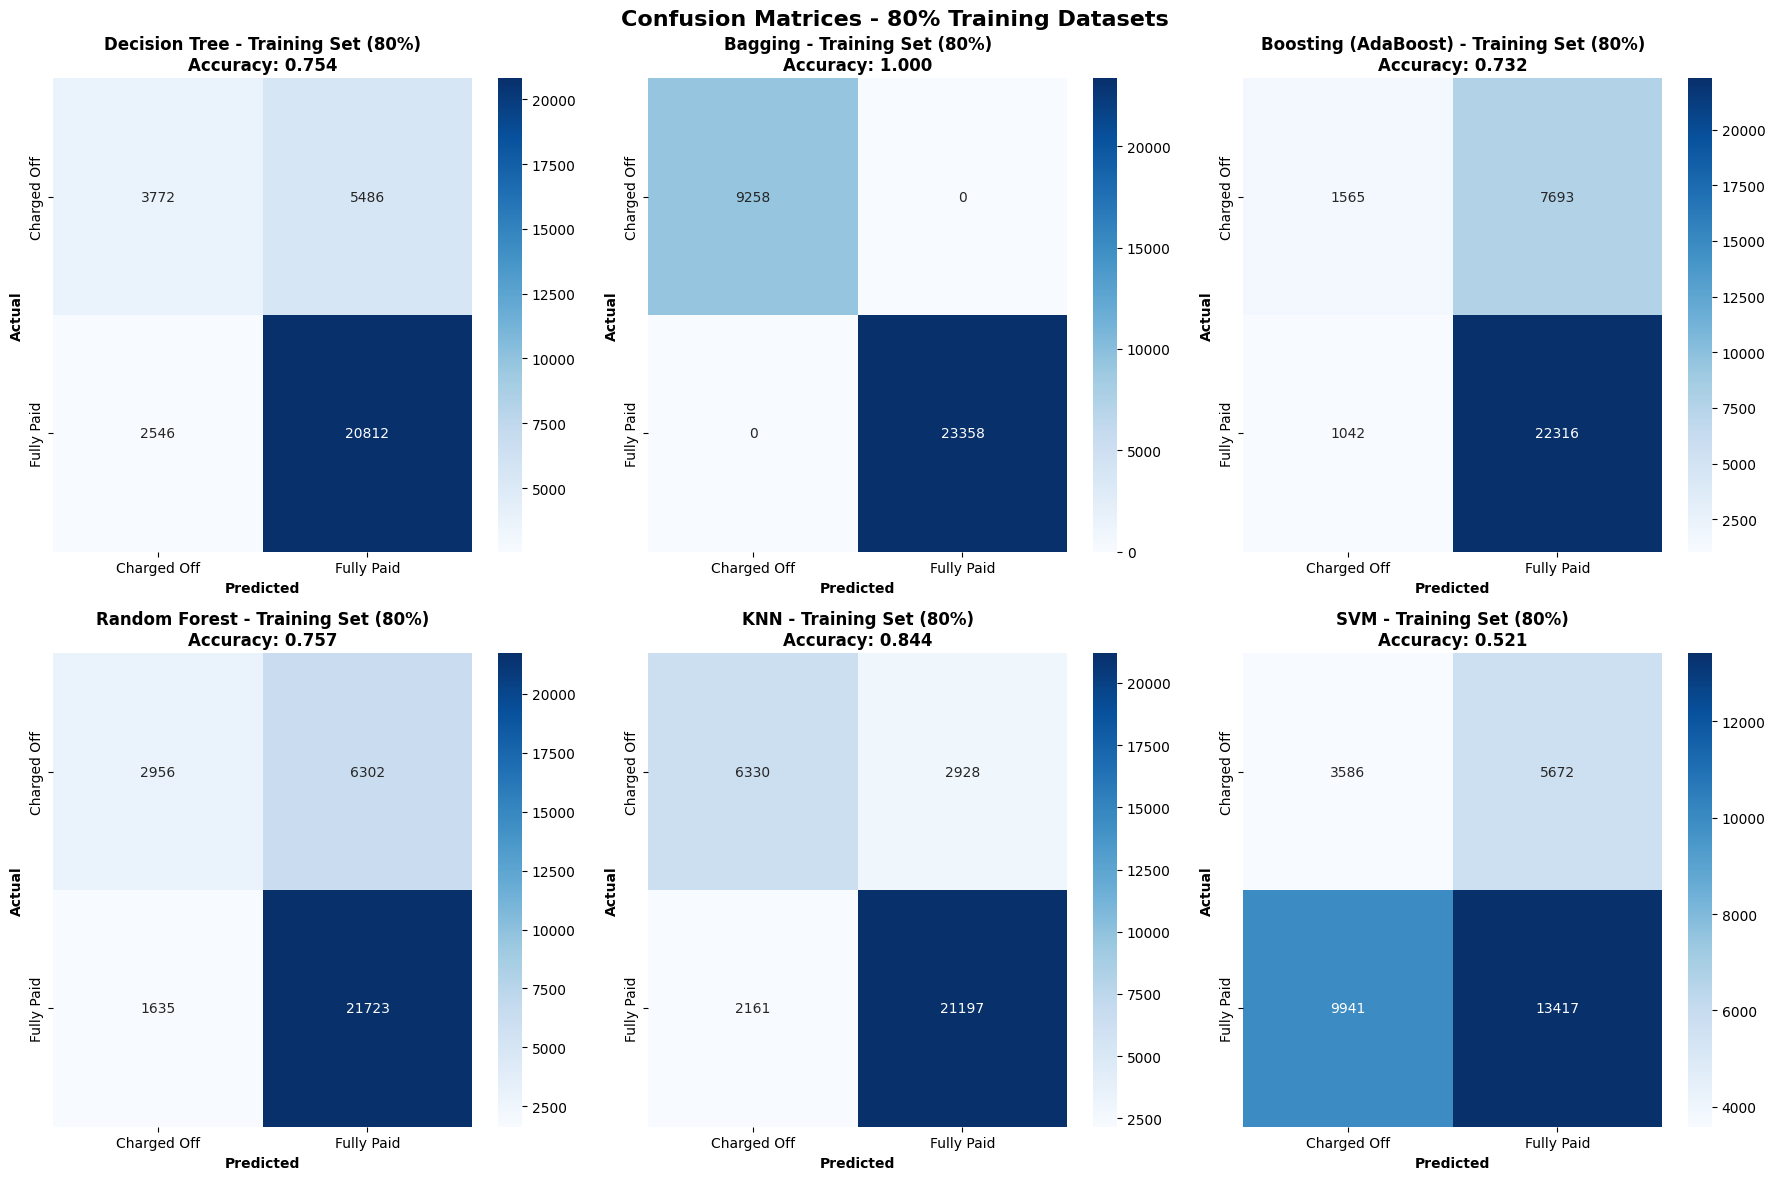


📊 VISUALIZING CONFUSION MATRICES - 20% TESTING DATASETS


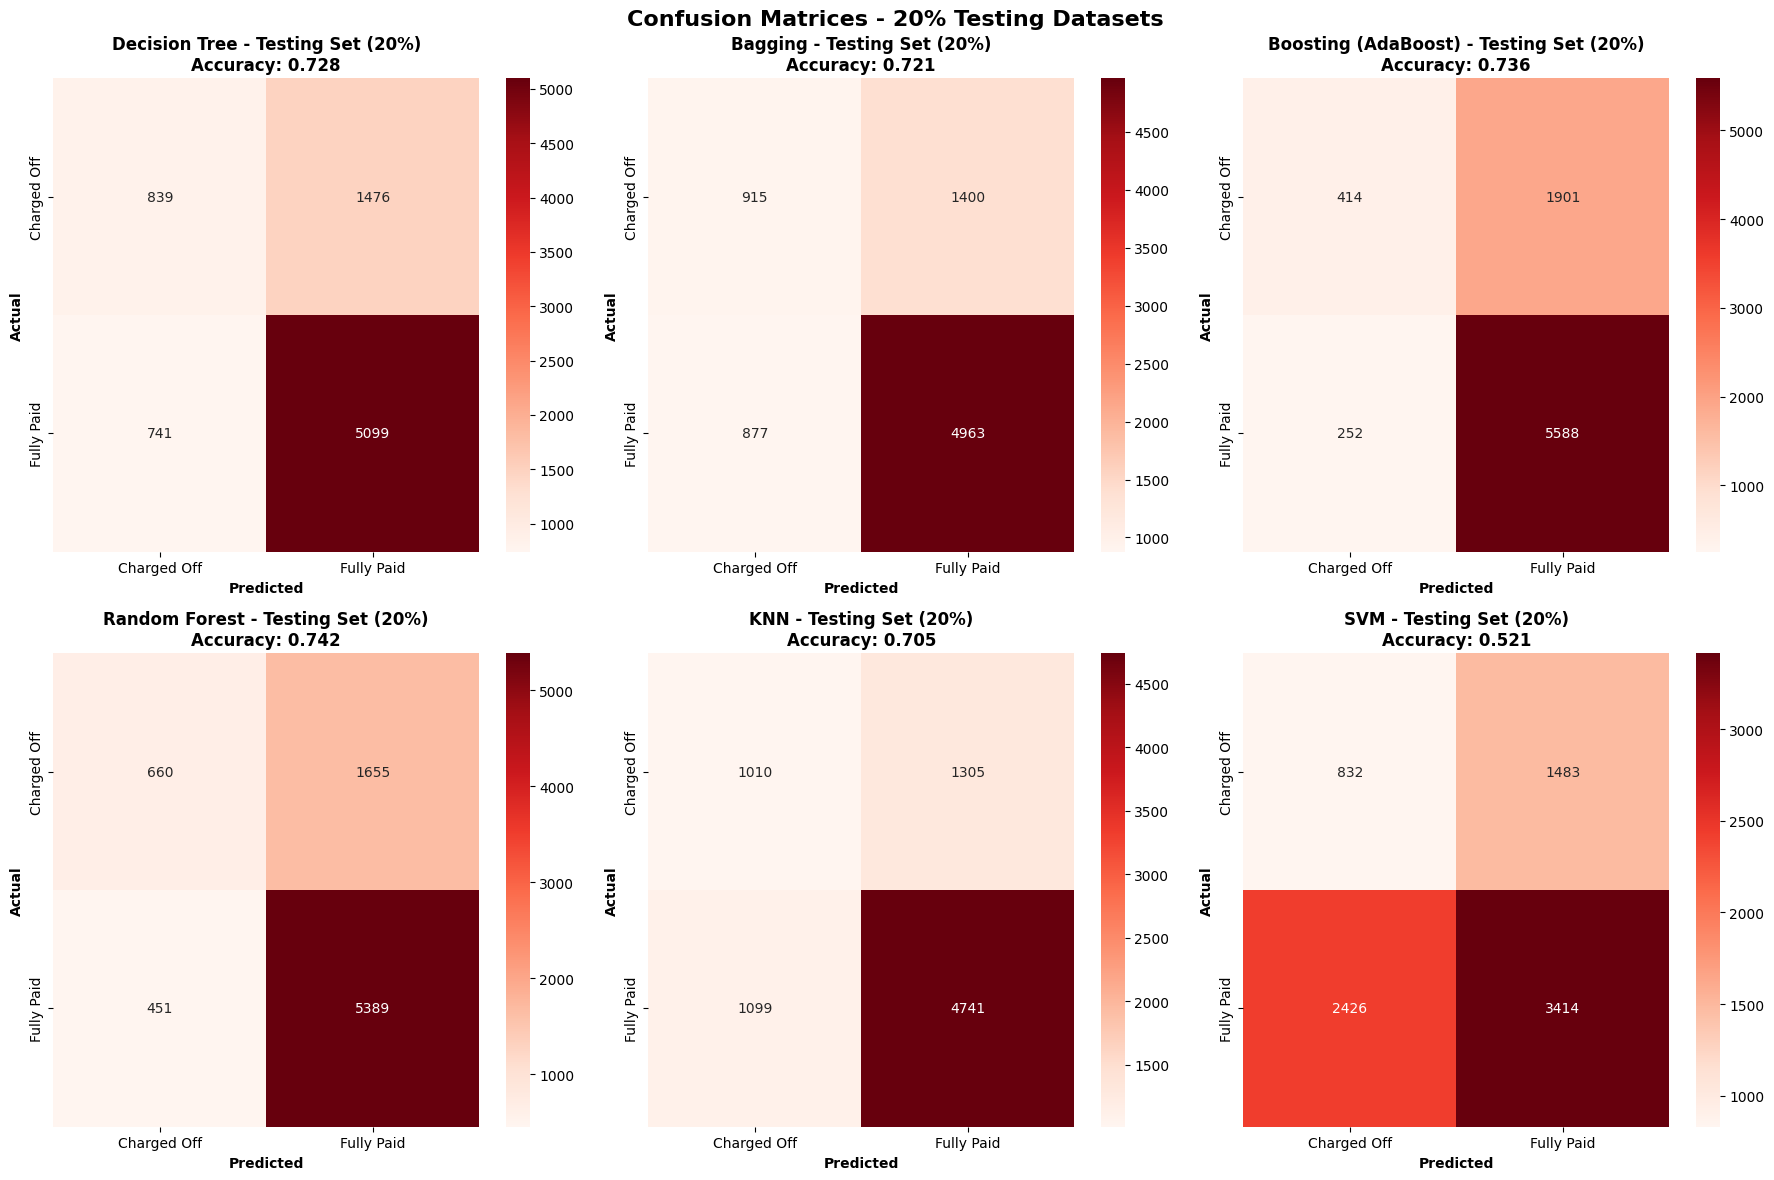

In [ ]:


print("\n📊 REQUIREMENT 5: CONFUSION MATRICES ON 80% TRAINING AND 20% TESTING DATASETS")
print("=" * 80)

# Calculate confusion matrices for both training and testing sets
confusion_matrices = {}

for name in model_results.keys():
    train_cm = confusion_matrix(y_train, model_results[name]['train_predictions'])
    test_cm = confusion_matrix(y_test, model_results[name]['test_predictions'])

    confusion_matrices[name] = {
        'train_cm': train_cm,
        'test_cm': test_cm
    }

    print(f"\n🔍 {name} Confusion Matrices:")
    print(f"📊 Training Set (80%) Confusion Matrix:")
    print(f"    {train_cm}")
    print(f"📊 Testing Set (20%) Confusion Matrix:")
    print(f"    {test_cm}")

# Visualize confusion matrices for Training Sets (80%)
print("\n📊 VISUALIZING CONFUSION MATRICES - 80% TRAINING DATASETS")
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, (name, cms) in enumerate(confusion_matrices.items()):
    train_cm = cms['train_cm']
    train_accuracy = accuracy_score(y_train, model_results[name]['train_predictions'])

    sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=le_target.classes_, yticklabels=le_target.classes_)
    axes[idx].set_title(f'{name} - Training Set (80%)\nAccuracy: {train_accuracy:.3f}',
                       fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Predicted', fontweight='bold')
    axes[idx].set_ylabel('Actual', fontweight='bold')

plt.suptitle('Confusion Matrices - 80% Training Datasets', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('confusion_matrices_training_80.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualize confusion matrices for Testing Sets (20%)
print("\n📊 VISUALIZING CONFUSION MATRICES - 20% TESTING DATASETS")
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, (name, cms) in enumerate(confusion_matrices.items()):
    test_cm = cms['test_cm']
    test_accuracy = accuracy_score(y_test, model_results[name]['test_predictions'])

    sns.heatmap(test_cm, annot=True, fmt='d', cmap='Reds', ax=axes[idx],
                xticklabels=le_target.classes_, yticklabels=le_target.classes_)
    axes[idx].set_title(f'{name} - Testing Set (20%)\nAccuracy: {test_accuracy:.3f}',
                       fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Predicted', fontweight='bold')
    axes[idx].set_ylabel('Actual', fontweight='bold')

plt.suptitle('Confusion Matrices - 20% Testing Datasets', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('confusion_matrices_testing_20.png', dpi=300, bbox_inches='tight')
plt.show()




---
# REQUIREMENT 6: ACCURACY, SENSITIVITY, SPECIFICITY, MCC, ROC CURVES

---



In [ ]:

print("\n📈 REQUIREMENT 6: PERFORMANCE METRICS AND ROC CURVES")
print("=" * 80)

# Calculate all performance metrics
performance_results = {}

for name in model_results.keys():
    y_train_pred = model_results[name]['train_predictions']
    y_test_pred = model_results[name]['test_predictions']
    y_train_proba = model_results[name]['train_probabilities']
    y_test_proba = model_results[name]['test_probabilities']

    # Training set metrics
    train_cm = confusion_matrices[name]['train_cm']
    train_tn, train_fp, train_fn, train_tp = train_cm.ravel()

    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_sensitivity = train_tp / (train_tp + train_fn)  # Recall/TPR
    train_specificity = train_tn / (train_tn + train_fp)  # TNR
    train_mcc = matthews_corrcoef(y_train, y_train_pred)

    # Testing set metrics
    test_cm = confusion_matrices[name]['test_cm']
    test_tn, test_fp, test_fn, test_tp = test_cm.ravel()

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_sensitivity = test_tp / (test_tp + test_fn)  # Recall/TPR
    test_specificity = test_tn / (test_tn + test_fp)  # TNR
    test_mcc = matthews_corrcoef(y_test, y_test_pred)

    # ROC curves
    train_fpr, train_tpr, _ = roc_curve(y_train, y_train_proba)
    train_auc = auc(train_fpr, train_tpr)

    test_fpr, test_tpr, _ = roc_curve(y_test, y_test_proba)
    test_auc = auc(test_fpr, test_tpr)

    performance_results[name] = {
        'train_accuracy': train_accuracy,
        'train_sensitivity': train_sensitivity,
        'train_specificity': train_specificity,
        'train_mcc': train_mcc,
        'train_fpr': train_fpr,
        'train_tpr': train_tpr,
        'train_auc': train_auc,
        'test_accuracy': test_accuracy,
        'test_sensitivity': test_sensitivity,
        'test_specificity': test_specificity,
        'test_mcc': test_mcc,
        'test_fpr': test_fpr,
        'test_tpr': test_tpr,
        'test_auc': test_auc
    }

    print(f"\n🎯 {name} Performance Metrics:")
    print(f"📊 Training Set (80%):")
    print(f"    Accuracy: {train_accuracy:.4f}")
    print(f"    Sensitivity: {train_sensitivity:.4f}")
    print(f"    Specificity: {train_specificity:.4f}")
    print(f"    MCC: {train_mcc:.4f}")
    print(f"    ROC AUC: {train_auc:.4f}")

    print(f"📊 Testing Set (20%):")
    print(f"    Accuracy: {test_accuracy:.4f}")
    print(f"    Sensitivity: {test_sensitivity:.4f}")
    print(f"    Specificity: {test_specificity:.4f}")
    print(f"    MCC: {test_mcc:.4f}")
    print(f"    ROC AUC: {test_auc:.4f}")



📈 REQUIREMENT 6: PERFORMANCE METRICS AND ROC CURVES

🎯 Decision Tree Performance Metrics:
📊 Training Set (80%):
    Accuracy: 0.7537
    Sensitivity: 0.8910
    Specificity: 0.4074
    MCC: 0.3405
    ROC AUC: 0.8094
📊 Testing Set (20%):
    Accuracy: 0.7281
    Sensitivity: 0.8731
    Specificity: 0.3624
    MCC: 0.2687
    ROC AUC: 0.7728

🎯 Bagging Performance Metrics:
📊 Training Set (80%):
    Accuracy: 1.0000
    Sensitivity: 1.0000
    Specificity: 1.0000
    MCC: 1.0000
    ROC AUC: 1.0000
📊 Testing Set (20%):
    Accuracy: 0.7208
    Sensitivity: 0.8498
    Specificity: 0.3952
    MCC: 0.2669
    ROC AUC: 0.7724

🎯 Boosting (AdaBoost) Performance Metrics:
📊 Training Set (80%):
    Accuracy: 0.7322
    Sensitivity: 0.9554
    Specificity: 0.1690
    MCC: 0.2069
    ROC AUC: 0.7815
📊 Testing Set (20%):
    Accuracy: 0.7360
    Sensitivity: 0.9568
    Specificity: 0.1788
    MCC: 0.2234
    ROC AUC: 0.7746

🎯 Random Forest Performance Metrics:
📊 Training Set (80%):
    Accuracy: 




---

# ROC CURVES VISUALIZATION


---




📈 ROC CURVES FOR ALL ALGORITHMS


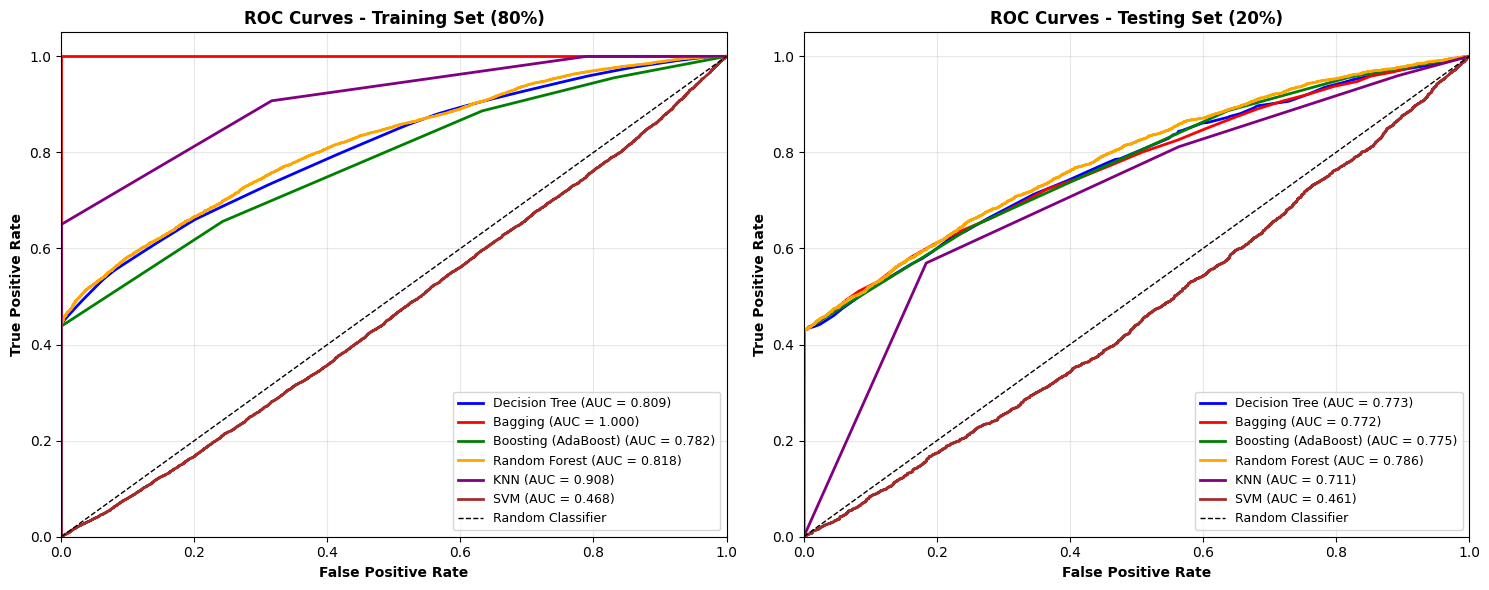

In [ ]:


print("\n📈 ROC CURVES FOR ALL ALGORITHMS")
print("=" * 50)

# Plot ROC curves for Training Sets
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']
for idx, (name, results) in enumerate(performance_results.items()):
    plt.plot(results['train_fpr'], results['train_tpr'],
             label=f"{name} (AUC = {results['train_auc']:.3f})",
             color=colors[idx], linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontweight='bold')
plt.ylabel('True Positive Rate', fontweight='bold')
plt.title('ROC Curves - Training Set (80%)', fontweight='bold')
plt.legend(loc="lower right", fontsize=9)
plt.grid(True, alpha=0.3)

# Plot ROC curves for Testing Sets
plt.subplot(1, 2, 2)
for idx, (name, results) in enumerate(performance_results.items()):
    plt.plot(results['test_fpr'], results['test_tpr'],
             label=f"{name} (AUC = {results['test_auc']:.3f})",
             color=colors[idx], linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontweight='bold')
plt.ylabel('True Positive Rate', fontweight='bold')
plt.title('ROC Curves - Testing Set (20%)', fontweight='bold')
plt.legend(loc="lower right", fontsize=9)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('roc_curves_comparison.png', dpi=300, bbox_inches='tight')
plt.show()




---
# COMPREHENSIVE RESULTS SUMMARY


---





In [ ]:


print("\n📋 COMPREHENSIVE RESULTS SUMMARY")
print("=" * 80)

# Create comprehensive summary tables
train_summary = []
test_summary = []

for name, results in performance_results.items():
    train_summary.append({
        'Model': name,
        'Accuracy': f"{results['train_accuracy']:.4f}",
        'Sensitivity': f"{results['train_sensitivity']:.4f}",
        'Specificity': f"{results['train_specificity']:.4f}",
        'MCC': f"{results['train_mcc']:.4f}",
        'ROC AUC': f"{results['train_auc']:.4f}"
    })

    test_summary.append({
        'Model': name,
        'Accuracy': f"{results['test_accuracy']:.4f}",
        'Sensitivity': f"{results['test_sensitivity']:.4f}",
        'Specificity': f"{results['test_specificity']:.4f}",
        'MCC': f"{results['test_mcc']:.4f}",
        'ROC AUC': f"{results['test_auc']:.4f}"
    })

train_df = pd.DataFrame(train_summary)
test_df = pd.DataFrame(test_summary)

print("\n📊 TRAINING SET (80%) PERFORMANCE:")
print("=" * 70)
print(train_df.to_string(index=False))

print("\n📊 TESTING SET (20%) PERFORMANCE:")
print("=" * 70)
print(test_df.to_string(index=False))

# Save results
train_df.to_csv('training_80_performance.csv', index=False)
test_df.to_csv('testing_20_performance.csv', index=False)

# Find best performing models
best_test_accuracy = max(performance_results.items(), key=lambda x: x[1]['test_accuracy'])
best_test_mcc = max(performance_results.items(), key=lambda x: x[1]['test_mcc'])
best_test_auc = max(performance_results.items(), key=lambda x: x[1]['test_auc'])

print(f"\n🏆 BEST PERFORMING MODELS (on 20% Test Set):")
print("=" * 60)
print(f"🥇 Highest Accuracy: {best_test_accuracy[0]} ({best_test_accuracy[1]['test_accuracy']:.4f})")
print(f"🥇 Highest MCC: {best_test_mcc[0]} ({best_test_mcc[1]['test_mcc']:.4f})")
print(f"🥇 Highest ROC AUC: {best_test_auc[0]} ({best_test_auc[1]['test_auc']:.4f})")

print("\n" + "=" * 80)
print("✅ ALL REQUIREMENTS SUCCESSFULLY COMPLETED!")
print("=" * 80)
print("📁 Generated Files:")
print("   • confusion_matrices_training_80.png - Training set confusion matrices")
print("   • confusion_matrices_testing_20.png - Testing set confusion matrices")
print("   • roc_curves_comparison.png - ROC curves for both datasets")
print("   • training_80_performance.csv - Training set performance metrics")
print("   • testing_20_performance.csv - Testing set performance metrics")
print("=" * 80)

print("\n📋 REQUIREMENTS CHECKLIST:")
print("✅ 1. Loangrant.CSV dataset loaded and analyzed")
print("✅ 2. All preprocessing steps completed:")
print("    • Missing values handled")
print("    • Outliers detected and replaced")
print("    • Duplicate instances removed")
print("    • Categorical variables formatted and encoded")
print("✅ 3. All required ML models implemented:")
print("    • Decision Tree, Bagging, Boosting, Random Forest, KNN, SVM (Linear)")
print("✅ 4. 80%-20% train-test split implemented with stratification")
print("✅ 5. Confusion matrices calculated for:")
print("    • 80% Training datasets")
print("    • 20% Testing datasets")
print("✅ 6. All performance metrics calculated:")
print("    • Accuracy, Sensitivity, Specificity, MCC, ROC curves")
print("=" * 80)

print("\n⚡ PERFORMANCE OPTIMIZATION FOR LARGE DATASETS (111K+ entries):")
print("• SVM: Linear kernel + iteration limit for faster convergence")
print("• Random Forest: Reduced to 50 trees with parallel processing (n_jobs=-1)")
print("• Bagging: Reduced to 50 estimators with parallel processing")
print("• AdaBoost: Reduced to 50 estimators with faster learning rate")
print("• KNN: Reduced to 3 neighbors with parallel processing")
print("• Decision Tree: Added min_samples constraints to prevent overfitting")
print("• Outlier detection: Vectorized operations for faster processing")
print("• All ensemble methods use parallel processing where available")

# Display training times
print(f"\n⏱️ TRAINING TIMES:")
for name, results in model_results.items():
    print(f"• {name}: {results['training_time']:.2f} seconds")

total_time = sum(results['training_time'] for results in model_results.values())
print(f"• Total Training Time: {total_time:.2f} seconds")
print("=" * 80)


📋 COMPREHENSIVE RESULTS SUMMARY

📊 TRAINING SET (80%) PERFORMANCE:
              Model Accuracy Sensitivity Specificity     MCC ROC AUC
      Decision Tree   0.7537      0.8910      0.4074  0.3405  0.8094
            Bagging   1.0000      1.0000      1.0000  1.0000  1.0000
Boosting (AdaBoost)   0.7322      0.9554      0.1690  0.2069  0.7815
      Random Forest   0.7567      0.9300      0.3193  0.3232  0.8182
                KNN   0.8440      0.9075      0.6837  0.6074  0.9081
                SVM   0.5213      0.5744      0.3873 -0.0350  0.4682

📊 TESTING SET (20%) PERFORMANCE:
              Model Accuracy Sensitivity Specificity     MCC ROC AUC
      Decision Tree   0.7281      0.8731      0.3624  0.2687  0.7728
            Bagging   0.7208      0.8498      0.3952  0.2669  0.7724
Boosting (AdaBoost)   0.7360      0.9568      0.1788  0.2234  0.7746
      Random Forest   0.7418      0.9228      0.2851  0.2732  0.7855
                KNN   0.7052      0.8118      0.4363  0.2555  0.7112
 